## ✅ Step 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## ✅ Step 2: Load the Dataset

In [3]:
# Load the dataset
data = pd.read_csv('supermart_grocery_sales.csv')
# Display the first few rows of the dataset
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


## ✅ Step 3: Data Preprocessing

In [4]:
# Check for missing values
data.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [5]:
# Drop any rows with missing values
data.dropna(inplace=True)
# Check for duplicates
data.drop_duplicates(inplace=True)

In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
print(data['Order Date'].dtype)


datetime64[ns]


In [8]:
# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

In [9]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8,11,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12,6,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11,10,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11,10,2016


## ✅ Step 4: Exploratory Data Analysis (EDA)

1. Distribution of Sales by Category

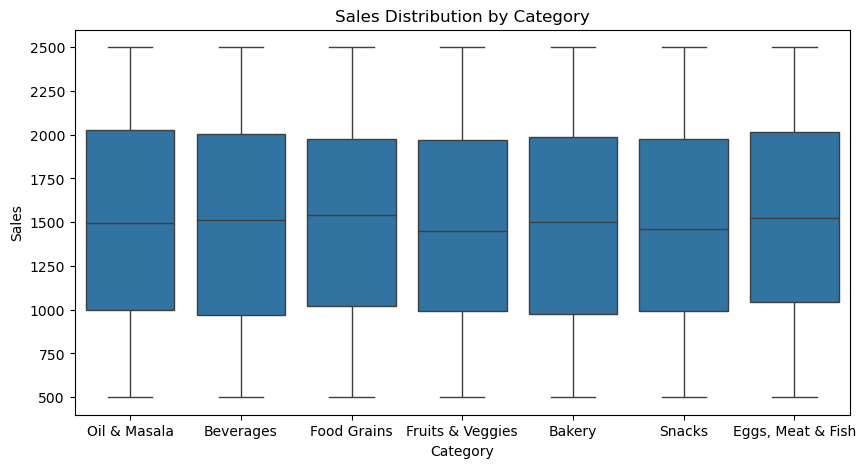

✅ This boxplot helps us visualize how sales are distributed across different product categories.


In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Sales', data=data)
plt.title('Sales Distribution by Category')
plt.show()
print("✅ This boxplot helps us visualize how sales are distributed across different product categories.")

2. Sales Trends Over Time

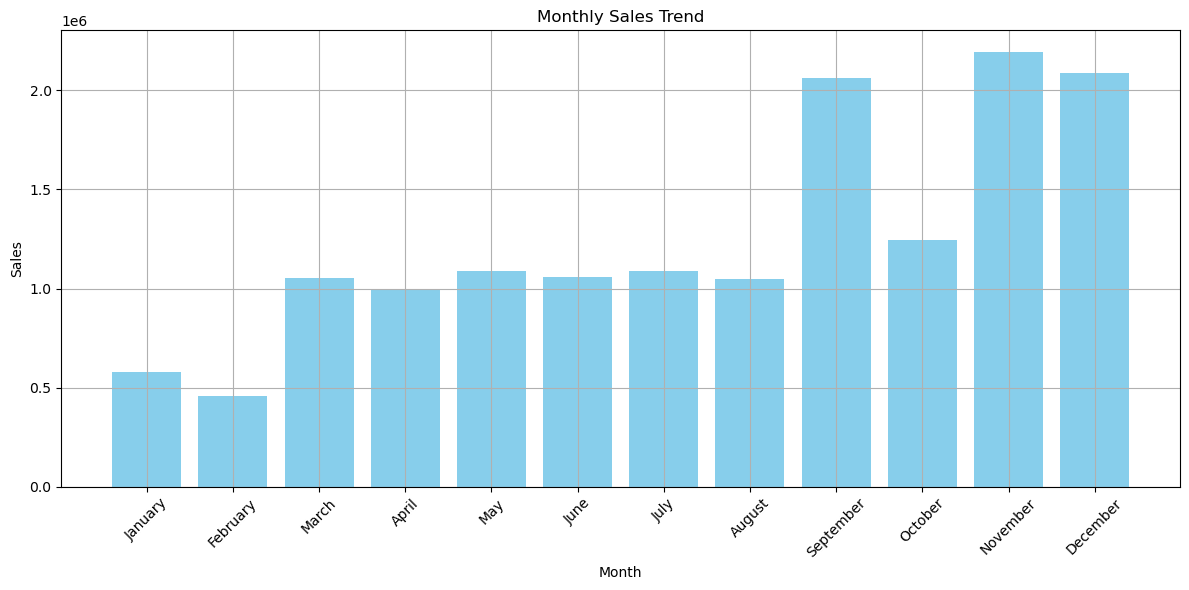

In [27]:
import calendar

# Convert numeric month to month names
data['Month'] = data['Order Month'].apply(lambda x: calendar.month_name[x])

# Ensure month order
month_order = list(calendar.month_name)[1:]  # Exclude empty string at index 0

# Group and sort months in correct calendar order
monthly_sales = data.groupby('Month')['Sales'].sum().reindex(month_order)

# Plot using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales.index, monthly_sales.values, color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


3. Yearly Sales

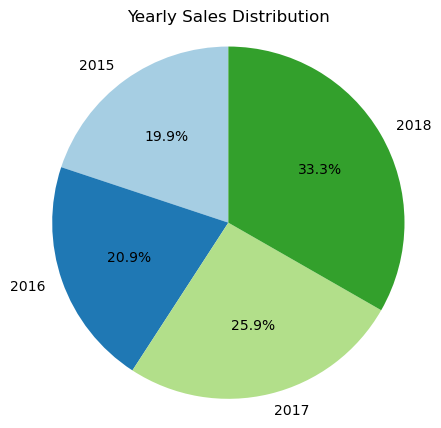

In [35]:
yearly_sales = data.groupby('Order Year')['Sales'].sum()

plt.figure(figsize=(5, 5))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Yearly Sales Distribution')
plt.axis('equal')  # Ensures the pie is a circle
plt.show()


##  ✅ Step 5: Label Encoding for Categorical Variables

In [38]:
# Initialize the label encoder
le = LabelEncoder()
# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Order Month'] = le.fit_transform(data['Order Month'])
# Display the first few rows after encoding

print("✅ We convert categorical text columns to numeric values using label encoding for model compatibility.")
data.head()

✅ We convert categorical text columns to numeric values using label encoding for model compatibility.


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year,Month
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8,10,2017,November
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8,10,2017,November
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12,5,2017,June
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11,9,2016,October
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11,9,2016,October


## ✅ Step 6: Feature Selection and Model Building

In [43]:
from sklearn.preprocessing import LabelEncoder

# Copy the data to avoid modifying the original
features = ['Category', 'Sub Category', 'City', 'Order Date', 'Region', 'Discount', 'Profit', 'State', 'Order Month', 'Month', 'Order Year']
X = data[features].copy()

# Convert 'Order Date' to ordinal
X['Order Date'] = X['Order Date'].map(pd.Timestamp.toordinal)

# Label encode all categorical columns
label_enc = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = label_enc.fit_transform(X[col])


## ✅ Step 7: Train a Linear Regression Model

In [45]:
# Convert 'Order Date' to ordinal
data['Order Date'] = data['Order Date'].map(pd.Timestamp.toordinal)

# Option: Use Label Encoding to fix the string column issue
label_enc = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = label_enc.fit_transform(X[col])

# Now split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


print("✅ The dataset is split into training and test sets, and a linear regression model is trained.")

✅ The dataset is split into training and test sets, and a linear regression model is trained.


##  ✅ Step 8: Evaluate the Model

In [46]:
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')


Mean Squared Error: 212932.71
R-squared Score: 0.35


✅ We evaluate the model's performance using Mean Squared Error and R² score

## ✅ Step 9: Visualize the Results

1. Actual vs Predicted Sales



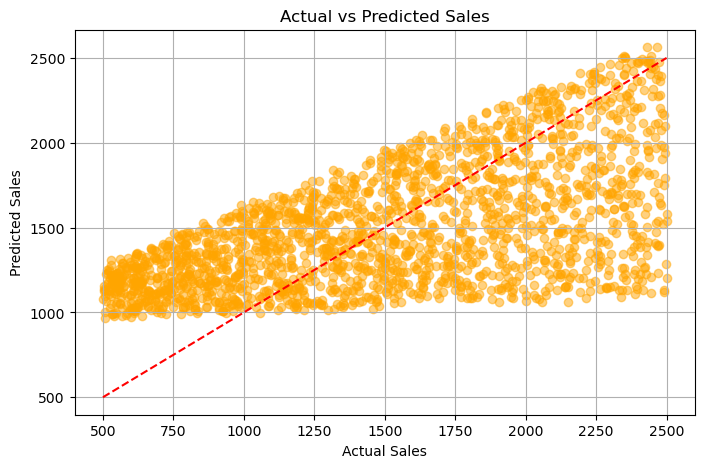

In [47]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


✅ This scatter plot helps visualize how close the predictions are to actual sales values.

## ✅ Step 10: Conclusion


In [48]:
print("The linear regression model provides a baseline for predicting sales based on various features.")
print("With a decent R² score, we can say that some features like profit, discount, region, and time are useful predictors.")
print("To improve accuracy, advanced models such as Random Forest or XGBoost and hyperparameter tuning could be explored.")


The linear regression model provides a baseline for predicting sales based on various features.
With a decent R² score, we can say that some features like profit, discount, region, and time are useful predictors.
To improve accuracy, advanced models such as Random Forest or XGBoost and hyperparameter tuning could be explored.
